# MY FINANCIAL DASHBOARD

## Number One

In [7]:
# Number One
import yfinance as yf


tesla = yf.Ticker("TSLA")
tesla_date = tesla.history(period="max")


tesla_date.reset_index(inplace=True)

print(tesla_date.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Number 2

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'


html_data = requests.get(url).text
soup = BeautifulSoup(html_data, 'html.parser')


tables = soup.find_all('table')  
tesla_revenue_table = None


for table in tables:
    if "Revenue" in table.text:
        tesla_revenue_table = table
        break


rows = tesla_revenue_table.find_all('tr')
data = []

for row in rows:
    cols = row.find_all('td')  
    cols = [col.text.strip() for col in cols]  
    if cols:  
        data.append(cols)


tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])


tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "").astype(float, errors="ignore")


print(tesla_revenue.tail())



    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


# Number 3

In [9]:
import yfinance as yf

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")  

gme_data.reset_index(inplace=True)

print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Number 4

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
html_data_2 = requests.get(url).text


soup = BeautifulSoup(html_data_2, 'html.parser')  


tables = soup.find_all('table')  
gme_revenue_table = None


for table in tables:
    if "Revenue" in table.text:
        gme_revenue_table = table
        break


rows = gme_revenue_table.find_all('tr')  

for row in rows:
    cols = row.find_all('td')  
    cols = [col.text.strip() for col in cols]  
    if cols:  
        data.append(cols)


gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])


gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "").astype(float, errors="ignore")


print(gme_revenue.tail())


    Date  Revenue
24  2009   8806.0
25  2008   7094.0
26  2007   5319.0
27  2006   3092.0
28  2005   1843.0


# Number 5

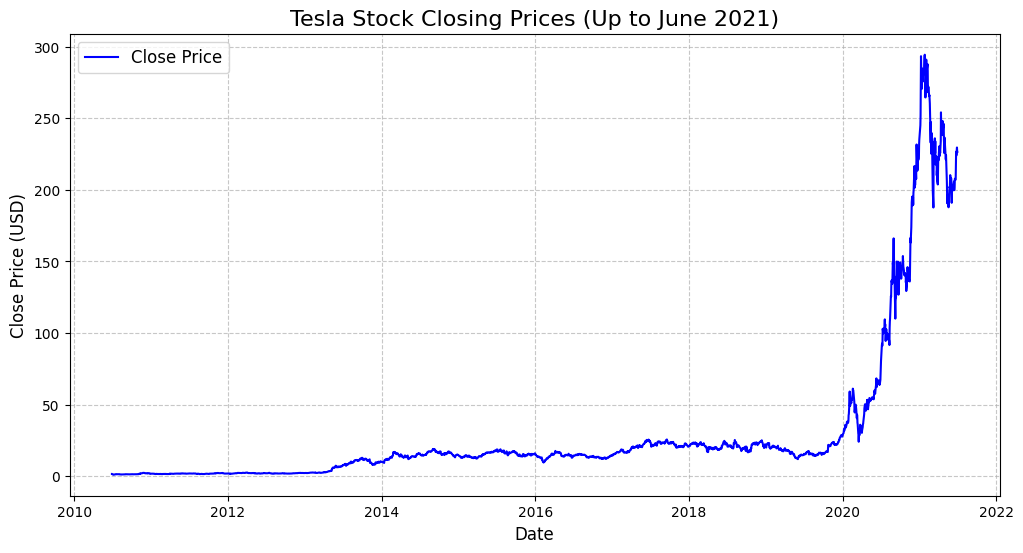

In [11]:
import matplotlib.pyplot as plt
import yfinance as yf


tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")


tesla_data = tesla_data[tesla_data.index <= "2021-06-30"]


def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data["Close"], label="Close Price", color="blue")
    plt.title(title, fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Close Price (USD)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend(fontsize=12)
    plt.show()


make_graph(tesla_data, "Tesla Stock Closing Prices (Up to June 2021)")


# Number 6

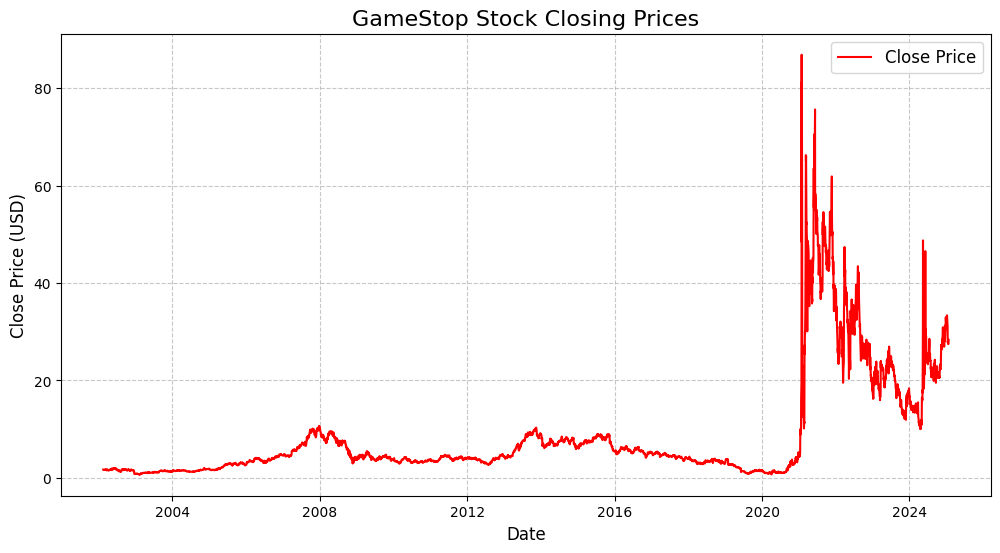

In [12]:
import matplotlib.pyplot as plt
import yfinance as yf


gme = yf.Ticker("GME")
gme_data = gme.history(period="max")


gme_data.reset_index(inplace=True)


def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data["Date"], data["Close"], label="Close Price", color="red")
    plt.title(title, fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Close Price (USD)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend(fontsize=12)
    plt.show()


make_graph(gme_data, "GameStop Stock Closing Prices")
